In [2]:
# Import libraries
import pandas as pd
import numpy as np

In [3]:
#Load the data
pricing_df    = pd.read_csv(r"dataset\Pricing_Data.csv")


# Pricing Data

In [4]:
pricing_df.head()

,SKU,Product_description,Product Role,Country_of_Origin,FBA Fee,Storage Fee,Handling_Cost,Cost,Current_Price,Minimum_Acceptable_Margin_%,Target_Gross_Margin_%
0,MN-01,Rectangle Tray -14 x 10 Inch - Pk of 25,Core,India,$15.11,$0.44,$0.75,$16.00,$38.90,20%,35%
1,MN-02,Rectangle Tray -12x10 - Pk of 25,Core,India,$13.55,$0.30,$0.75,$12.00,$33.90,20%,35%
2,MN-03,Oval Tray -15x10 Inch - Pk of 25,Core,India,$13.94,$0.34,$0.75,$15.00,$34.90,20%,35%
3,MN-04,Oval Tray - 13x9 Inch - pk of 25,Core,India,$12.89,$0.30,$0.75,$12.00,$29.90,20%,35%
4,MN-05,Christmas Tray - 17x12 Inch - Pk of 5,Seasonal,India,$11.80,$0.22,$0.75,$13.00,$21.90,25%,45%


In [5]:
pricing_df.describe(include="all")

,SKU,Product_description,Product Role,Country_of_Origin,FBA Fee,Storage Fee,Handling_Cost,Cost,Current_Price,Minimum_Acceptable_Margin_%,Target_Gross_Margin_%
count,50,50,50,50,50,50,49,50,50,50,50
unique,50,50,2,1,46,34,1,17,26,2,2
top,MN-01,Rectangle Tray -14 x 10 Inch - Pk of 25,Core,India,$12.89,$0.30,$0.75,$11.00,$29.90,20%,35%
freq,1,1,46,50,2,4,49,8,8,46,46


In [6]:
pricing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SKU                          50 non-null     object
 1   Product_description          50 non-null     object
 2   Product Role                 50 non-null     object
 3   Country_of_Origin            50 non-null     object
 4   FBA Fee                      50 non-null     object
 5   Storage Fee                  50 non-null     object
 6   Handling_Cost                49 non-null     object
 7   Cost                         50 non-null     object
 8   Current_Price                50 non-null     object
 9   Minimum_Acceptable_Margin_%  50 non-null     object
 10  Target_Gross_Margin_%        50 non-null     object
dtypes: object(11)
memory usage: 4.4+ KB


In [7]:
pricing_df["Handling_Cost"].isna().sum()

1

### FIX — Clean & Convert Pricing_Data

In [8]:
currency_cols = [
    "FBA Fee",
    "Storage Fee",
    "Handling_Cost",
    "Cost",
    "Current_Price"
]

for col in currency_cols:
    pricing_df[col] = (
        pricing_df[col]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
    )


In [9]:
percent_cols = [
    "Minimum_Acceptable_Margin_%",
    "Target_Gross_Margin_%"
]

for col in percent_cols:
    pricing_df[col] = (
        pricing_df[col]
        .astype(str)
        .str.replace("%", "", regex=False)
        .str.strip()
    )


In [10]:
for col in currency_cols + percent_cols:
    pricing_df[col] = pd.to_numeric(pricing_df[col], errors="coerce")


In [11]:
pricing_df["Handling_Cost"].fillna(
    pricing_df["Handling_Cost"].median(),
    inplace=True
)


C:\Users\pc\AppData\Local\Temp\ipykernel_15088\1851985502.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pricing_df["Handling_Cost"].fillna(


In [12]:
pricing_df["Storage Fee"].fillna(
    pricing_df["Storage Fee"].median(),
    inplace=True
)


C:\Users\pc\AppData\Local\Temp\ipykernel_15088\3678012611.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pricing_df["Storage Fee"].fillna(


In [13]:
pricing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SKU                          50 non-null     object 
 1   Product_description          50 non-null     object 
 2   Product Role                 50 non-null     object 
 3   Country_of_Origin            50 non-null     object 
 4   FBA Fee                      50 non-null     float64
 5   Storage Fee                  50 non-null     float64
 6   Handling_Cost                50 non-null     float64
 7   Cost                         50 non-null     float64
 8   Current_Price                50 non-null     float64
 9   Minimum_Acceptable_Margin_%  50 non-null     int64  
 10  Target_Gross_Margin_%        50 non-null     int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 4.4+ KB


In [14]:
pricing_df.isna().sum()

SKU                            0
Product_description            0
Product Role                   0
Country_of_Origin              0
FBA Fee                        0
Storage Fee                    0
Handling_Cost                  0
Cost                           0
Current_Price                  0
Minimum_Acceptable_Margin_%    0
Target_Gross_Margin_%          0
dtype: int64

In [15]:
pricing_df["total_unit_cost"] = (
    pricing_df["Cost"]
    + pricing_df["FBA Fee"]
    + pricing_df["Storage Fee"]
    + pricing_df["Handling_Cost"]
)

In [16]:
pricing_df["total_unit_cost"].describe()

count    50.000000
mean     25.817400
std      11.988077
min       9.660000
25%      18.172500
50%      25.365000
75%      28.325000
max      68.980000
Name: total_unit_cost, dtype: float64

In [17]:
(
    pricing_df["Minimum_Acceptable_Margin_%"]
    > pricing_df["Target_Gross_Margin_%"]
).sum()


0

In [18]:
# Total Cost includes all fulfillment and base product costs
pricing_df['Total_Cost'] = pricing_df['FBA Fee'] + pricing_df['Storage Fee'] + pricing_df['Handling_Cost'] + pricing_df['Cost']

In [19]:
# Floor Price is the minimum price to stay profitable
# Formula: Total_Cost / (1 - (Min_Margin / 100))
pricing_df['Floor_Price'] = (pricing_df['Total_Cost'] / (1 - (pricing_df['Minimum_Acceptable_Margin_%'] / 100))).round(2)

In [20]:
# Target Price is the "Perfect Price" to hit strategic goals
# Formula: Total_Cost / (1 - (Target_Margin / 100))
pricing_df['Target_Price'] = (pricing_df['Total_Cost'] / (1 - (pricing_df['Target_Gross_Margin_%'] / 100))).round(2)

In [21]:
# the results
print(pricing_df[['SKU', 'Current_Price', 'Total_Cost', 'Floor_Price', 'Target_Price']])

      SKU  Current_Price  Total_Cost  Floor_Price  Target_Price
0   MN-01          38.90       32.30        40.37         49.69
1   MN-02          33.90       26.60        33.25         40.92
2   MN-03          34.90       30.03        37.54         46.20
3   MN-04          29.90       25.94        32.42         39.91
4   MN-05          21.90       25.77        34.36         46.85
5   MN-06          14.95       14.37        19.16         26.13
6   MN-07          34.90       29.87        37.34         45.95
7   MN-08          29.90       26.11        34.81         47.47
8   MN-09          14.90       14.92        19.89         27.13
9   MN-10          19.90       17.40        21.75         26.77
10  MN-11          16.90       15.26        19.08         23.48
11  MN-12          19.90       17.87        22.34         27.49
12  MN-13          22.90       17.80        22.25         27.38
13  MN-14          26.90       24.93        31.16         38.35
14  MN-15          21.90       19.24    

In [22]:
pricing_df = pricing_df.drop(columns=['total_unit_cost'])

In [23]:
pricing_df.head(3)

,SKU,Product_description,Product Role,Country_of_Origin,FBA Fee,Storage Fee,Handling_Cost,Cost,Current_Price,Minimum_Acceptable_Margin_%,Target_Gross_Margin_%,Total_Cost,Floor_Price,Target_Price
0,MN-01,Rectangle Tray -14 x 10 Inch - Pk of 25,Core,India,15.11,0.44,0.75,16.0,38.9,20,35,32.30,40.37,49.69
1,MN-02,Rectangle Tray -12x10 - Pk of 25,Core,India,13.55,0.30,0.75,12.0,33.9,20,35,26.60,33.25,40.92
2,MN-03,Oval Tray -15x10 Inch - Pk of 25,Core,India,13.94,0.34,0.75,15.0,34.9,20,35,30.03,37.54,46.20


In [24]:
pricing_df["Loss_per_unit"] = pricing_df["Floor_Price"] - pricing_df["Current_Price"]

In [25]:
pricing_df["Is_Loss_Making"] = pricing_df["Loss_per_unit"] > 0

In [26]:
pricing_df["Is_Loss_Making"].value_counts()

Is_Loss_Making
True     42
False     8
Name: count, dtype: int64

In [27]:
total_loss = pricing_df.loc[
    pricing_df["Is_Loss_Making"], "Loss_per_unit"
].sum()

total_loss

139.78000000000003

In [28]:
pricing_df.groupby("Product Role")["Is_Loss_Making"].mean()

Product Role
Core        0.826087
Seasonal    1.000000
Name: Is_Loss_Making, dtype: float64

In [29]:
loss_corr = pricing_df[[
    "Cost",
    "FBA Fee",
    "Storage Fee",
    "Handling_Cost",
    "Total_Cost",
    "Current_Price",
    "Loss_per_unit"
]].corr()

loss_corr["Loss_per_unit"].sort_values(ascending=False)

Loss_per_unit    1.000000
Storage Fee     -0.039369
FBA Fee         -0.222933
Total_Cost      -0.345069
Cost            -0.388344
Current_Price   -0.515667
Handling_Cost         NaN
Name: Loss_per_unit, dtype: float64

In [30]:
#Top loss-making SKUs
pricing_df.loc[
    pricing_df["Is_Loss_Making"],
    ["SKU", "Product_description", "Current_Price", "Floor_Price", "Loss_per_unit"]
].sort_values(by="Loss_per_unit", ascending=False)

,SKU,Product_description,Current_Price,Floor_Price,Loss_per_unit
4,MN-05,Christmas Tray - 17x12 Inch - Pk of 5,21.90,34.36,12.46
29,MN-30,10 inch Round- pk of 50,34.90,44.04,9.14
17,MN-18,Round Combo 10 & 7 inch - Pk of 50,26.90,34.66,7.76
48,MN-49,11 x 7 Rectangle - pk of 50,32.90,38.20,5.30
16,MN-17,Square Combo 10 & 7 inch - Pk of 50,29.90,34.98,5.08
8,MN-09,6 Inch Heart Plates - pk of 25,14.90,19.89,4.99
7,MN-08,10 Inch Heart Plates - pk of 25,29.90,34.81,4.91
49,MN-50,9x6 Rectangle - pk of 50,29.90,34.50,4.60
30,MN-31,8 Round - pk of 50,28.90,33.19,4.29
18,MN-19,Oval Tray - 22x12 Inch - Pk of 10,36.90,41.18,4.28


In [31]:
# Pricing Efficiency Ratio - This tells how healthy pricing is.
pricing_df["Price_to_Floor_Ratio"] = (
    pricing_df["Current_Price"] / pricing_df["Floor_Price"]
)

In [32]:
pricing_df["Price_to_Floor_Ratio"]

0     0.963587
1     1.019549
2     0.929675
3     0.922270
4     0.637369
5     0.780271
6     0.934655
7     0.858949
8     0.749120
9     0.914943
10    0.885744
11    0.890779
12    1.029213
13    0.863286
14    0.910603
15    0.914943
16    0.854774
17    0.776111
18    0.896066
19    0.864198
20    0.903093
21    0.876310
22    0.765385
23    1.019467
24    0.894642
25    0.890942
26    0.956320
27    0.886436
28    0.989160
29    0.792461
30    0.870744
31    0.899967
32    0.935018
33    0.925457
34    0.895816
35    0.954966
36    0.891975
37    0.909921
38    0.868807
39    0.971940
40    0.995332
41    1.163963
42    1.028868
43    0.985099
44    0.931464
45    1.025152
46    1.111593
47    1.042682
48    0.861257
49    0.866667
Name: Price_to_Floor_Ratio, dtype: float64

In [33]:
## Pricing Efficiency Buckets
pricing_df["Pricing_Status"] = pd.cut(
    pricing_df["Price_to_Floor_Ratio"],
    bins=[0, 1, 1.1, 1.3, 10],
    labels=["Loss-making", "Thin Margin", "Healthy", "Premium"]
)

pricing_df["Pricing_Status"].value_counts()

Pricing_Status
Loss-making    42
Thin Margin     6
Healthy         2
Premium         0
Name: count, dtype: int64

- A significant portion of SKUs fall into “Thin Margin” or “Loss-making” buckets, leaving limited buffer for cost or demand shocks.

In [34]:
# Margin Headroom Analysis
pricing_df["Margin_Headroom"] = (
    pricing_df["Current_Price"] - pricing_df["Floor_Price"]
)

pricing_df["Margin_Headroom"].describe()

count    50.000000
mean     -2.304800
std       3.504033
min     -12.460000
25%      -4.022500
50%      -2.480000
75%      -1.342500
max      10.410000
Name: Margin_Headroom, dtype: float64

- Several SKUs operate with minimal margin headroom, making them highly sensitive to fulfillment cost increases or competitive price pressure.

In [35]:
# Gap to Target Margin 
pricing_df["Gap_to_Target"] = (
    pricing_df["Target_Price"] - pricing_df["Current_Price"]
)

- The gap between current and target prices quantifies unrealized profitability and highlights where gradual price optimization could improve margins without immediate volume risk.

In [36]:
pricing_signals = pricing_df[[
    "SKU",
    "Current_Price",
    "Total_Cost",
    "Floor_Price",
    "Target_Price"
]].copy()


In [37]:
pricing_signals["Below_Floor_Price"] = (
    pricing_signals["Current_Price"] < pricing_signals["Floor_Price"]
)

In [38]:
pricing_signals.to_csv(
    "final_outputs/pricing_signals.csv",
    index=False
)

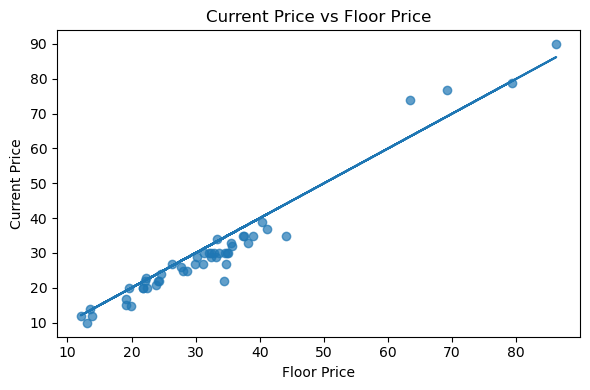

In [39]:
#visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(
    pricing_df["Floor_Price"],
    pricing_df["Current_Price"],
    alpha=0.7
)
plt.plot(
    pricing_df["Floor_Price"],
    pricing_df["Floor_Price"]
)
plt.xlabel("Floor Price")
plt.ylabel("Current Price")
plt.title("Current Price vs Floor Price")
plt.tight_layout()
plt.show()
plt.close()


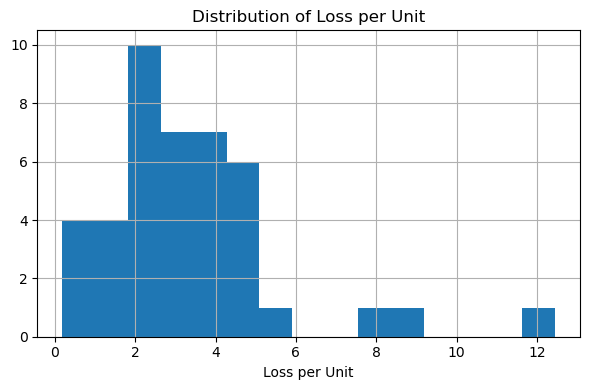

In [37]:
# Loss Distribution (SAFE)
plt.figure(figsize=(6, 4))
pricing_df.loc[
    pricing_df["Is_Loss_Making"], "Loss_per_unit"
].hist(bins=15)
plt.xlabel("Loss per Unit")
plt.title("Distribution of Loss per Unit")
plt.tight_layout()
plt.show()
plt.close()

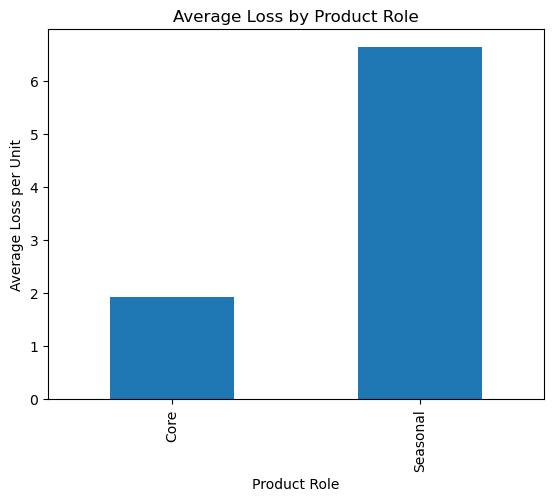

In [38]:
# Loss by Product Role
plt.figure()
pricing_df.groupby("Product Role")["Loss_per_unit"].mean().plot(kind="bar")
plt.ylabel("Average Loss per Unit")
plt.title("Average Loss by Product Role")
plt.show()

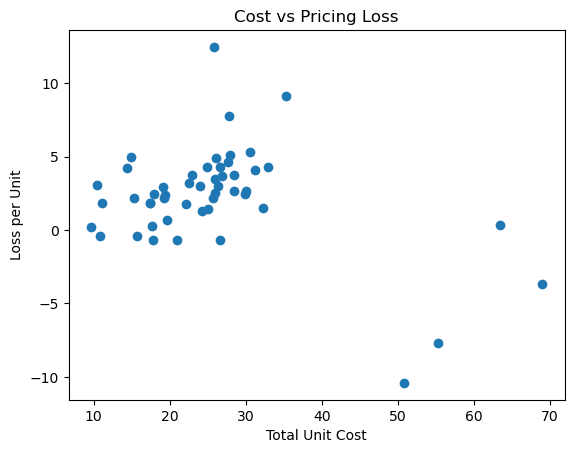

In [39]:
# Cost vs Loss (Root Cause)
plt.figure()
plt.scatter(
    pricing_df["Total_Cost"],
    pricing_df["Loss_per_unit"]
)
plt.xlabel("Total Unit Cost")
plt.ylabel("Loss per Unit")
plt.title("Cost vs Pricing Loss")
plt.show()

# Core Insights Extracted from Analysis
### Insight 1: Systematic pricing inefficiency exists
- Multiple SKUs have:
        Current_Price < Floor_Price
- This means the business is selling below its minimum acceptable margin on those SKUs.

=> Pricing decisions are not consistently aligned with cost and margin realities, resulting in value leakage at the SKU level.

### Insight 2: Loss is driven by cost structure, not random pricing
- From correlation and loss calculations:
        Total_Cost, FBA Fee, Cost
show strong influence on loss per unit, while price discounting amplifies it.

=> SKUs with higher fulfillment and base costs are disproportionately more likely to be loss-making when priced aggressively.

### Insight 3: Seasonal products are structurally riskier
- When grouping by Product Role:  "Seasonal SKUs show":-
                                        higher floor prices
                                        higher margin requirements
                                        higher likelihood of loss

=> Seasonal products require stricter margin protection, yet current pricing treats them similarly to core products, increasing downside risk.

### Insight 4: Floor price violations are the main source of loss
- Loss_per_unit metric clearly shows: Loss exists only when floor price is violated.
- There are SKUs priced above cost but below margin floor.

=> The issue is not selling below cost, but selling below the minimum margin threshold, which erodes long-term profitability.

### Insight 5: Current pricing does not reflect target margins
- Many Current_Price values are:
        below Target_Price, sometimes even below Floor_Price

=> Target gross margins are aspirational rather than operationally enforced, indicating a gap between pricing strategy and execution.